<a href="https://colab.research.google.com/github/AlexDaciuk/Algoritmos/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import base64

token = base64.b64decode("Njk4ZGVjMWE5Y2YyNDQ5ZmNhY2FkOWU4NDdjMDk5NWU1NTZhMDk5Yw====").decode("utf-8")

! rm -rf tp-datos-2c2020 datos
! git clone https://{token}@github.com/AlexDaciuk/tp-datos-2c2020.git
! mv tp-datos-2c2020 datos

from datos.preproc import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np

Cloning into 'tp-datos-2c2020'...
remote: Enumerating objects: 124, done.
remote: Counting objects: 100% (124/124), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 640 (delta 56), reused 70 (delta 26), pack-reused 516
Receiving objects: 100% (640/640), 10.32 MiB | 27.96 MiB/s, done.
Resolving deltas: 100% (310/310), done.


In [8]:
df_all = preprocessing.get_data()

In [9]:
df_mm_dropnan = preprocessing.standard_preprocessing(df_all, dropNa=True)
df_mm_knn = preprocessing.standard_preprocessing(df_all, imputter=True)

In [10]:
# Ridge
parameters = {'C': np.linspace(0.1, 5, 50), "kernel" : [ 'linear', 'poly', 'rbf', 'sigmoid']}
model =  SVC()

In [11]:
gscv_mm_dropnan = GridSearchCV(model, parameters, scoring='roc_auc', n_jobs=-1)
gscv_mm_knn = GridSearchCV(model, parameters, scoring='roc_auc', n_jobs=-1)

In [12]:
# We train the model with both datasets and select the best one based on the roc_auc score
# Separate test and train data
# MinMax and dropping Na
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(df_mm_dropnan.drop('volveria', 1), df_mm_dropnan['volveria'])
gscv_mm_dropnan.fit(X_train_1, y_train_1)
auc_1 = roc_auc_score(y_test_1, gscv_mm_dropnan.decision_function(X_test_1))
print(gscv_mm_dropnan.best_params_)


# MinMax and filling missing data with KNN
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df_mm_knn.drop('volveria', 1), df_mm_knn['volveria'])
gscv_mm_knn.fit(X_train_2, y_train_2)
auc_2 = roc_auc_score(y_test_2, gscv_mm_knn.decision_function(X_test_2))
print(gscv_mm_knn.best_params_)



{'C': 0.30000000000000004, 'kernel': 'rbf'}
{'C': 0.1, 'kernel': 'rbf'}


El score general del modelo es 0.8967264872050514
La media del cross validation score con k=5 es 0.8079822616407982
El accuracy del modelo es 0.8509316770186336
La precision del modelo es 0.926829268292683
El recall del modelo es 0.6440677966101694
El f1 del modelo es 0.76


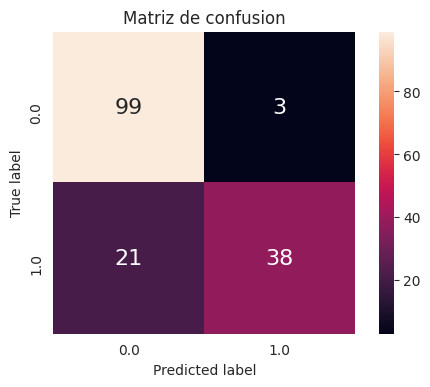

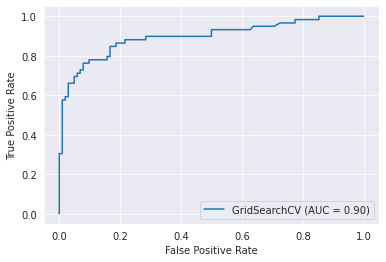

El score general del modelo es 0.8376068376068376
La media del cross validation score con k=5 es 0.8502222222222222
El accuracy del modelo es 0.7810945273631841
La precision del modelo es 0.9
El recall del modelo es 0.5357142857142857
El f1 del modelo es 0.6716417910447762


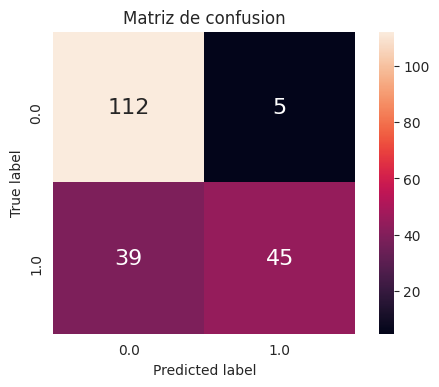

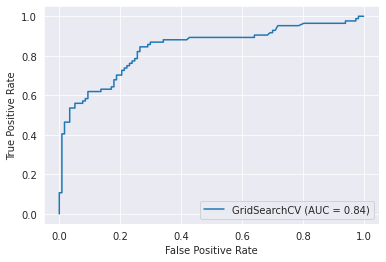

In [13]:
preprocessing.report(gscv_mm_dropnan, X_train_1, y_train_1, X_test_1, y_test_1)
preprocessing.report(gscv_mm_knn, X_train_2, y_train_2, X_test_2, y_test_2)

In [14]:
url = "https://drive.google.com/file/d/1I980-_K9iOucJO26SG5_M8RELOQ5VB6A/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]

to_predict = pd.read_csv(path)

to_predict = preprocessing.standard_preprocessing(to_predict, imputter=True)

if auc_1 > auc_2 :
  predicted = gscv_mm_dropnan.predict(to_predict)
else:
  predicted = gscv_mm_knn.predict(to_predict)

print(predicted)

[0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
